# Agglomerative Clustering!

**References:**

https://www.datanovia.com/en/lessons/agglomerative-hierarchical-clustering/

https://xlstat.com/en/solutions/features/agglomerative-hierarchical-clustering-ahc

https://www.geeksforgeeks.org/implementing-agglomerative-clustering-using-sklearn

https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c#:~:text=Silhouette%20Coefficient%20or%20silhouette%20score%20is%20a%20metric%20used%20to,each%20other%20and%20clearly%20distinguished.

https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

### Contents : 

1. <a href = "#Introduction:">Introduction</a>
2. <a href = "#How-does-it-work?">How Does it Work?</a>
3. <a href = "#Agglomerative-Hierarchical-Clustering-aggregation-methods">Clustering Aggregation Methods</a>
4. <a href = "#Agglomerative-Clustering:">Code for Clustering</a>

## Introduction:

The **agglomerative clustering** is the most common type of hierarchical clustering used to group objects in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named dendrogram.

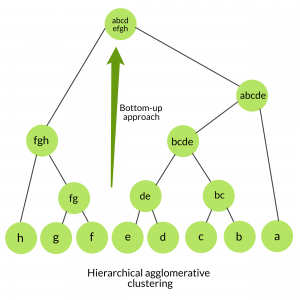

**Advantages:**

- It works from the dissimilarities between the objects to be grouped together. A type of dissimilarity can be suited to the subject studied and the nature of the data.

- One of the results is the dendrogram which shows the progressive grouping of the data. It is then possible to gain an idea of a suitable number of classes into which the data can be grouped.

### How does it work?

- The process starts by calculating the dissimilarity between the N objects.
- Then two objects which when clustered together minimize a given agglomeration criterion, are clustered together thus creating a class comprising these two objects.
- Then the dissimilarity between this class and the N-2 other objects is calculated using the agglomeration criterion. The two objects or classes of objects whose clustering together minimizes the agglomeration criterion are then clustered together.

These successive clustering operations produce a binary clustering tree (dendrogram), whose root is the class that contains all the observations. This dendrogram represents a hierarchy of partitions. It is then possible to choose a partition by truncating the tree at a given level, the level depending upon either user-defined constraints (the user knows how many classes are to be obtained) or more objective criteria.

### Agglomerative Hierarchical Clustering aggregation methods
To calculate the dissimilarity between two groups of objects A and B, different strategies are possible.

**Simple linkage:** The dissimilarity between A and B is the dissimilarity between the object of A and the object of B that are the most similar. Agglomeration using simple linkage tends to contract the data space and to flatten the levels of each step in the dendrogram. As the dissimilarity between two elements of A and of B is sufficient to link A and B, this criterion can lead to very long clusters (chaining effect) while they are not homogeneous.

**Complete linkage:** The dissimilarity between A and B is the largest dissimilarity between an object of A and an object of B. Agglomeration using complete linkage tends to dilate the data space and to produce compact clusters.

**Unweighted pair-group average linkage:** The dissimilarity between A and B is the average of the dissimilarities between the objects of A and the objects of B. Agglomeration using Unweighted pair-group average linkage is a good compromise between the two preceding criteria, and provides a fair representation of the data space properties.

**Weighted pair-group average linkage:** The average dissimilarity between the objects of A and of B is calculated as the sum of the weighted dissimilarities, so that equal weights are assigned to both groups. As with unweighted pair-group average linkage, this criterion provides a fairly good representation of the data space properties.

**Flexible linkage:** This criterion uses a â parameter that varies between [-1,+1]; this can generate a family of agglomeration criteria. For â = 0 the criterion is weighted pair-group average linkage. When â is near to 1, chain- like clusters result, but as â decreases and becomes negative, more and more dilatation is obtained.

**Ward’s method:** This method aggregates two groups so that within-group inertia increases as little as possible to keep the clusters homogeneous. This criterion, proposed by Ward (1963), can only be used in cases with quadratic distances, i.e. cases of Euclidian distance and Chi-square distance.

**Assumption:** The clustering technique assumes that each data point is similar enough to the other data points that the data at the starting can be assumed to be clustered in 1 cluster.


Lets dive into the code:


### Agglomerative Clustering:

In [1]:
# Importing the necessary libraries!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
# Loading the data!

X = pd.read_csv('../../Data/CC GENERAL.csv')
  
# Dropping the CUST_ID column from the data
X = X.drop('CUST_ID', axis = 1)
  
# Handling the missing values
X.fillna(method ='ffill', inplace = True)

In [3]:
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# Data Preprocessing!

# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

In [5]:
# Dimentionality Reduction!

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

We now determine the optimal number of clusters using a mathematical technique. Here, We will use the Silhouette Scores for the purpose.

**What is Silhouette Score?**

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

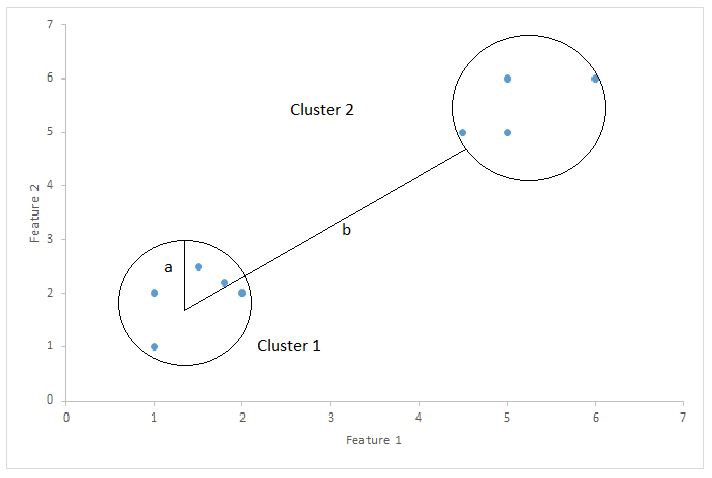

Silhouette Score = (b-a)/max(a,b)

where

Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a

Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b

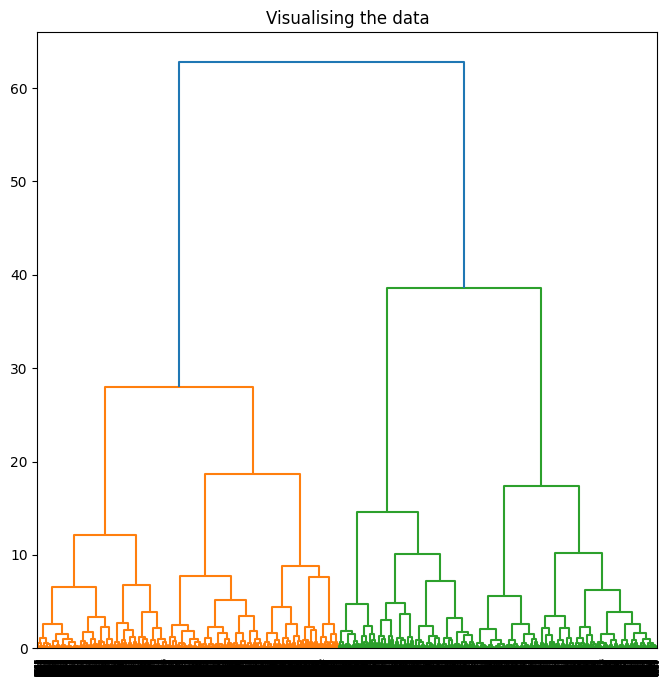

In [6]:
# Data Visualization!

plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

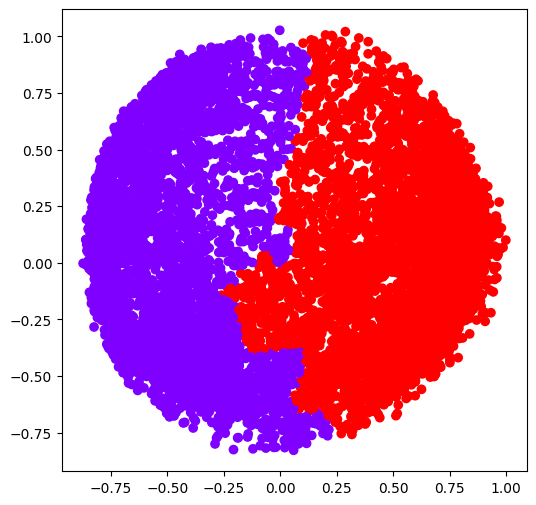

In [7]:
# Building and Visualizing the different clustering models for different values of k

# K=2

ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

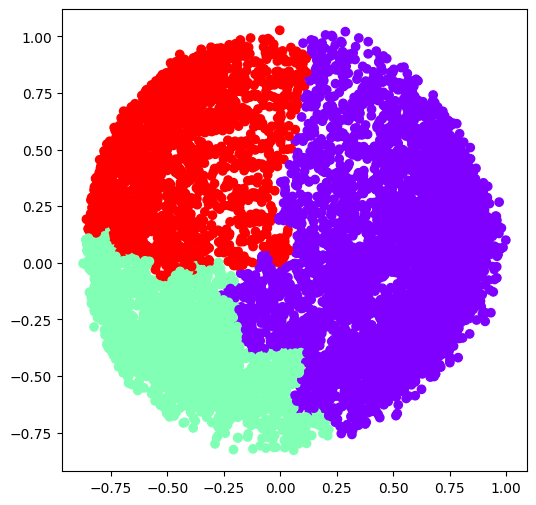

In [8]:
# K=3

ac3 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

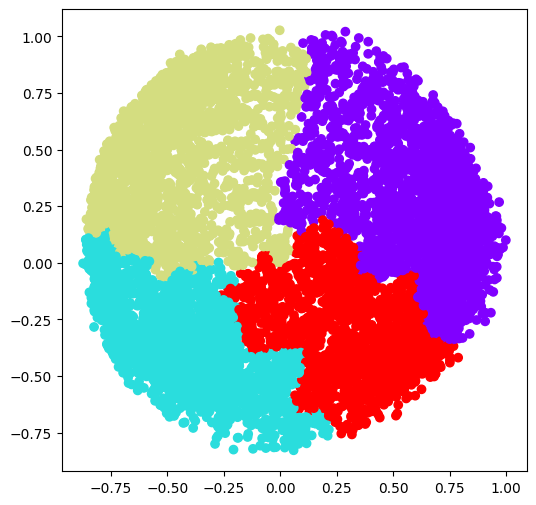

In [9]:
#k=4

ac4 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

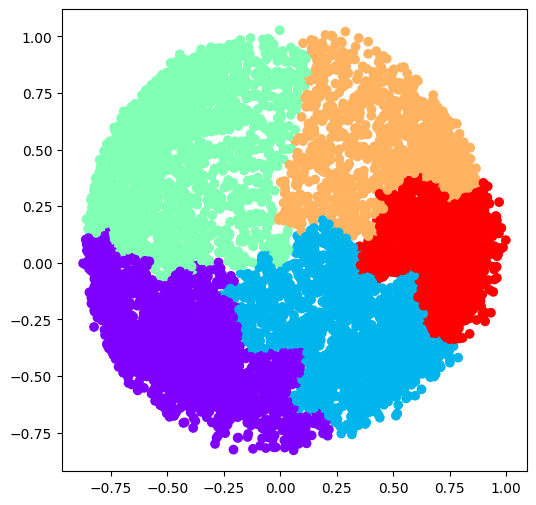

In [10]:
# k=5

ac5 = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

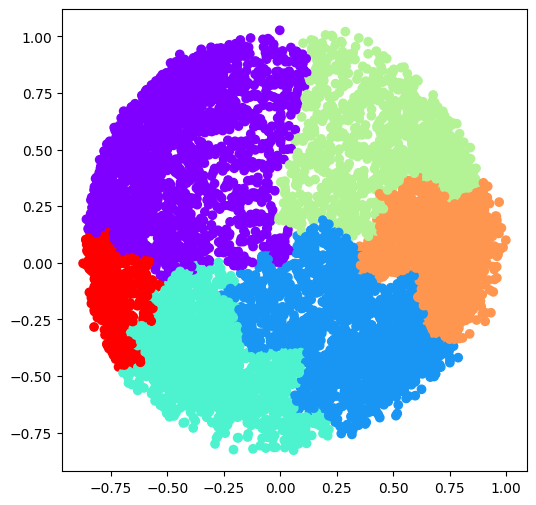

In [11]:
# k=6

ac6 = AgglomerativeClustering(n_clusters = 6)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

In [12]:
# Evaluating the different models and Visualizing the results.

k = [2, 3, 4, 5, 6]
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))

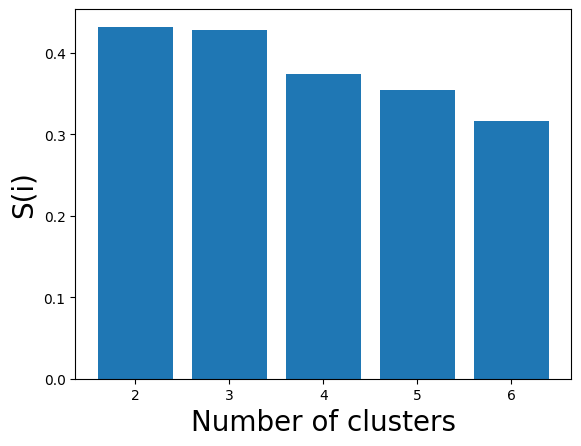

In [13]:
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

Thus, with the help of the silhouette scores, it is concluded that the optimal number of clusters for the given data and clustering technique is 3.

In [14]:
#tested:no errors

[<a href="#Contents-:">Back to Content</a>]

**The End**